<a href="https://colab.research.google.com/github/Chum4k3r/ex_eletroacusticaI/blob/main/EA_EX2_MassaMolaAmortecedor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Eletroacústica I - Analogias Mecânicas

# Exemplo 2
## Sistema massa-mola-amortecedor por parâmetros concentrados



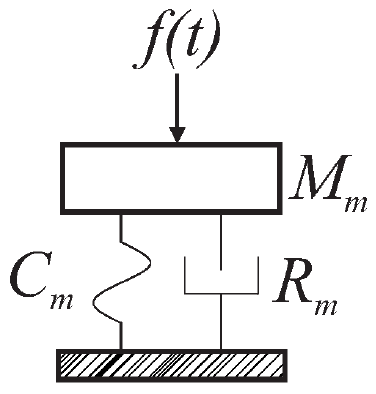

# Parâmetros

## $K_{m} = 100\ \text{kN/m}$

## $R_{m} = 100\ \text{Ns/m}$

## $M_{m} = 10\ \text{kg}$

## **Passo 1 e 2**

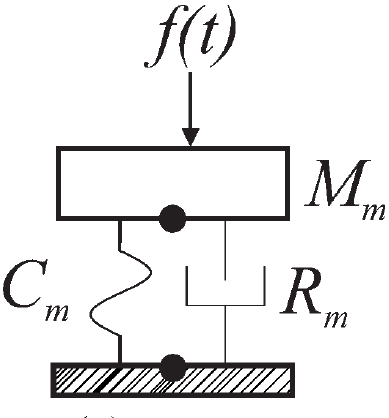

## **Passo 3 e 4**

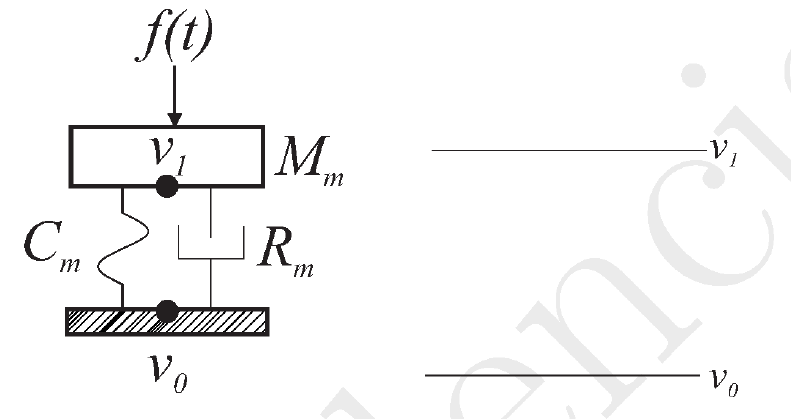

## **Passo 5 e 6**

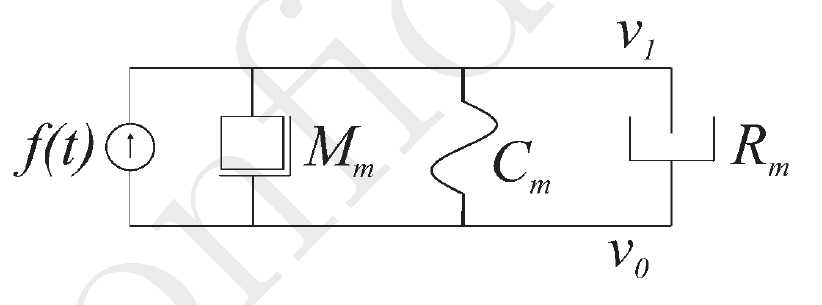

## **Passo 7**

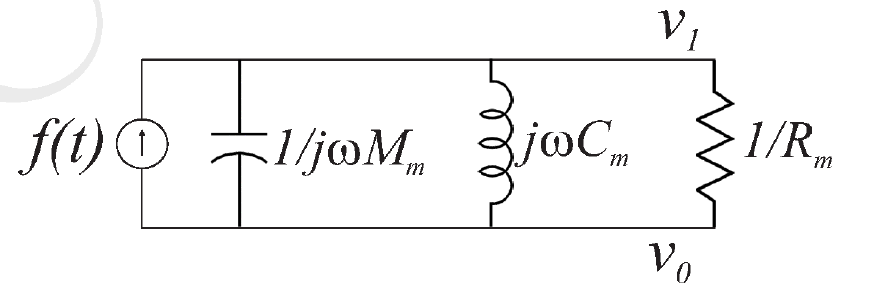

## Aplicando a lei das correntes de Kirchhof no domínio da frequência, temos:

## $f(t) = f_{M}(t) + f_{C}(t) + f_{R}(t)$

## $\tilde{F} = \large\frac{\tilde{V}}{(\text{j}\omega M_{m})^{-1}} \normalsize+ \large\frac{\tilde{V}}{\text{j}\omega C_{m}} \normalsize+ \large\frac{\tilde{V}}{R_{m}^{-1}}$

## $\tilde{F} = \large\frac{\tilde{V}}{(\text{j}\omega M_{m})^{-1}} \normalsize+ \large\frac{\tilde{V}}{\text{j}\omega C_{m}} \normalsize+ \large\frac{\tilde{V}}{R_{m}^{-1}}$

## $\tilde{F} = \tilde{V}\text{j}\omega M_{m} \normalsize + \large\frac{\tilde{V}}{\text{j}\omega C_{m}} \normalsize + \tilde{V}R_{m}$

## $\tilde{F} = \tilde{V}\left(\text{j}\omega M_{m} + \large\frac{1}{\text{j}\omega C_{m}} \normalsize+ R_{m}\right)$

## $\large\frac{\tilde{F}}{\tilde{V}} = \normalsize \text{j}\omega M_{m} + \large\frac{1}{\text{j}\omega C_{m}} \normalsize+ R_{m}$

## $\large\frac{\tilde{F}}{\tilde{V}} = \normalsize \large\frac{(\text{j}\omega)^{2}C_{m}M_{m} + 1 + \text{j}\omega C_{m}R_{m}}{\text{j}\omega C_{m}} \frac{C_{m}^{-1}}{C_{m}^{-1}} $

## $\large\frac{\tilde{F}}{\tilde{V}} = \normalsize \large\frac{-\omega^{2}M_{m} + \frac{1}{C_{m}} + \text{j}\omega R_{m}}{\text{j}\omega} $


## Queremos a analogia inversa, ou seja, FRF entre Deslocamento e Força

## $H_{m} = \large\frac{\tilde{X}}{\tilde{F}}\normalsize, \qquad  \tilde{V} = \text{j}\omega \tilde{X}$

## Aplicando, temos:

## $\large\frac{\tilde{V}}{\tilde{F}} \normalsize= \large\frac{\text{j}\omega}{\left(\frac{1}{C_{m}} - \omega^{2}M_{m}\right) + \text{j}\omega R_{m}} $

## $\large\frac{\text{j}\omega\tilde{X}}{\tilde{F}}  \normalsize= \large\frac{\text{j}\omega}{\left(\frac{1}{C_{m}} - \omega^{2}M_{m}\right) + \text{j}\omega R_{m}} $

## $H_{m} = \large\frac{1}{\left(\frac{1}{C_{m}} - \omega^{2}M_{m}\right) + \text{j}\omega R_{m}} $

### ou

## $H_{m} = \large\frac{1}{\left(K_{m} - \omega^{2}M_{m}\right) + \text{j}\omega R_{m}} $


In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
K = 100000.  # rigidez
R = 100.  # amortecimento 
M = 10.   # massa

w = (K / M)**0.5   # ressonancia

Rcrit = 2 * M * w   # amortecimento crítico
amort = R / Rcrit   #  coef amortecimento
wa = w * (1 - amort**2)**0.5  # ressonancia amortecida
fcut = wa / (2*np.pi)   # frequência de corte

f = np.linspace(1, 100, 1000, dtype='float32')   # espaço de frequências

omega = lambda x: 2*np.pi*x  # freq angular
decibel = lambda sinal: 10 * np.log10((sinal**2))  # magnitude

H = (K - omega(f)**2 * M + 1j * omega(f) * R)**-1  # FRF entre deslocamento e força
Hmag = np.abs(H) 
Hang = 180 * np.angle(H) / np.pi

print(f"freq amortecida = {fcut:.4f}")

freq amortecida = 15.8956


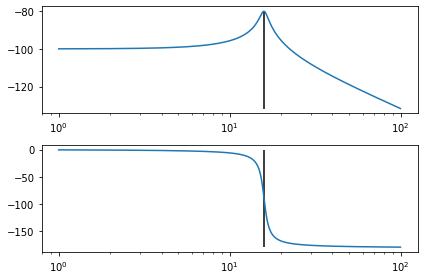

In [4]:
fig, axs = plt.subplots(2,1)

axs[0].semilogx(f, decibel(Hmag))
axs[0].vlines(fcut, decibel(np.min(Hmag)), decibel(np.max(Hmag)))

axs[1].semilogx(f, Hang)
axs[1].vlines(fcut, np.min(Hang), np.max(Hang))

fig.tight_layout()
fig.show()
